# Measures of spread

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats

food = pd.read_pickle("../data/processed/food")

We saw in the measures of central tendency section that the mean can be a poor representation of data if the data is skewed, and that we should therefore be careful when someone presents us with a mean (or average) without any further information.

One of the types of 'further information' that can help us is a measure of spread of the data around the mean value.
We usually use the *variance* and the *standard deviation* to quantify measure of spread.
Both are easy to calculate, and even easier to convert between each other.
We also sometimes see the range and inter--quartile range.
These are simpler to calculate, but less useful.

## Range

Simply the largest value, minus the smallest value.

In [2]:
food.P344pr.max() - food.P344pr.min()

1181.54

This is the full spread of the data set so doesn't tell us anything very useful in this case, and the range is very susceptible to outliers.
Therefore the inter--quartile range is more common.

## Inter--quartile range

As we saw above the range is very susceptible to outliers, so the inter--quartile range is effectively a 'trimmed' range by taking off the very lowest and the very highest values.
In fact, we take off the top 25% and the bottom 25% and specify this range.
This has the disadvantage of only describing the middle 50% of our data, but this is usually outweighed by the fact that this is less susceptible to outliers.

In [3]:
food.P344pr.quantile(0.75) - food.P344pr.quantile(0.25)

445.75049999999993

It's common to plot a **boxplot** to depict the range and interquartile range.

The figure below is a boxplot of the trimmed income (remember I removed the top--coded income category to create a more normal distribution).

- the mean is the green horizontal bar
- the interquartile range (representing 50% of the incomes) is the box
- the full range are the stalks (whiskers) at the very top and bottom of the figure

Text(0, 0.5, 'Income (£)')

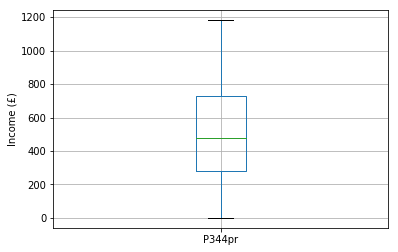

In [4]:
food.boxplot(column = "P344pr")
plt.xlabel("")
plt.ylabel("Income (£)")

The range and inter--quartile range are useful when beginning to understand and explore your data, but are not usually reported.
Instead the variance and standard deviation are more commonly reported, because they are more useful.

## Variance

To calculate the variance:

1. subtract the mean from each score
1. square the result
1. sum the results to produce one value
1. divide by $n - 1$ (number of observations minus one)

$$
\frac{\Sigma (x - \bar{x}) ^ 2}{n-1}
$$

Using $n - 1$ rather than simply the number of observations is known as [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction).
To calculate the variance of the population we must assume that the population mean is the same as the sample mean that we have observed.
In fixing the population mean we reduce the degrees of freedom of our observations, because if we change these the final observation is determined in order for the mean to remain constant.

For example if our sample mean is 100 we assume our population mean is also 100.
If we have two observations these might be 110 and 90 (mean 100).
If we change the 110 value to 120, the 90 value *must* change to 80 to ensure the sample mean (and therefore the population mean) remains 100, so there is only one degree of freedom.
We would therefore use $2 - 1$ as the denominator in our variance calculation.

The variance of our trimmed income data is:

In [5]:
food["P344pr"].var()

84230.34403890932

## Standard deviation

As you've probably noticed the variance is not in the units of the original data.
This is where the standard deviation comes in.
In fact the unit of the variance is the *square* of the unit of the original data.
The standard deviation is therefore a measure of spread in the units of the original data, and is calculated simply by square rooting the variance:

$$
\sqrt{\frac{\Sigma (x - \bar{x}) ^ 2}{n-1}}
$$

The standard deviation of the trimmed income is therefore:

In [6]:
food.P344pr.std()

290.22464409300136

The standard deviation is a measure of how far the data points are on average from the mean.
A small standard deviation means the mean fairly accurately represents the data; a large standard deviation means the mean does not represent the data well.

In the case of our example the standard deviation of the income data is quite large compared to the mean, suggesting a lot of variability even in the trimmed income data. The histograms support this, and suggest the mean might not be as good as the median in summarising this data.

In fact, using properties of the normal distribution and the standard deviation we can estimate that about 95% of cases fall between:

In [7]:
food.P344pr.mean() - 1.96 * food.P344pr.std()

-50.53468469783536

and:

In [8]:
food.P344pr.mean() + 1.96 * food.P344pr.std()

1087.14592014673

This is most of the data set, so the variability of the data suggest the mean may not be a useful summary of the data.